In [1]:
#!pip install tensorflow
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import random
from keras.callbacks import EarlyStopping
import math



In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Shape of the training and testing data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [3]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [4]:
def create_model(num_parameters, train_images, train_labels):
    if not isinstance(num_parameters, int) or num_parameters <= 0:
        raise ValueError("num_parameters must be a positive integer.")

    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images
        Dense(num_parameters, activation='relu'),   # Fully connected layer with num_parameters neurons\renewcommand{\thesection}{Appendix \Alph{section}}
        Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
    ])

    # Compile the model
#    model.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])

    # Compile the model
    #model.compile(optimizer='adam',
    #                loss='categorical_crossentropy',
    #                metrics=['accuracy'])
    sgd = SGD(momentum=0.95)
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model and store the training history
    history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

    # Extract the training and validation error from the history
    train_error = history.history['loss'][-1]  # Training error is the final loss value
    val_error = history.history['val_loss'][-1]  # Validation error is the final validation loss value

    return train_error, val_error, model.count_params()


In [5]:
# JEFF STINKING UP THE PLACE
# repeat of above cell, but with 4000 images (aligned with double-descent paper)
train_images = train_images[:4000]
train_labels = train_labels[:4000]

In [6]:
def get_num_hidden(n):
  # gives an approximation of the number of hidden layers for a desired number of parameters (n)
    return (n - 10) / (785 + 10 + 1)

#params = [2**i for i in range(2,8)] # these are number of units in the hidden layer
#params = [4, 8, 16, 32, 33, 34, 35, 40, 45, 49, 50, 51, 52, 55, 60, 64, 128] # JEFF STINKING UP THE PLACE
#params = [4, 8, 16, 32] + list(range(40, 60)) + [64, 128]

interpolation_threshold = len(train_images) * 10
interp_thresh_H = round(get_num_hidden(interpolation_threshold))
params = [4, 8, 16, 32] + list(range(interp_thresh_H-8, interp_thresh_H+8, 2)) + [64,76, 88, 100]


In [7]:
random.seed(321)
error = []
for num_params in params:
    train_error, val_error, num_params = create_model(num_params, train_images, train_labels)
    error.append({'number of parameters': num_params, 'Training Error': train_error, 'Validation Error': val_error})

#error = pd.DataFrame(columns=['Training Error', 'Validation Error'])
error= pd.DataFrame(error)#, columns=['Training Error', 'Validation Error'])
print(error)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1857 - loss: 2.1357 - val_accuracy: 0.4625 - val_loss: 1.5922
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5414 - loss: 1.3857 - val_accuracy: 0.6413 - val_loss: 1.0171
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6796 - loss: 0.9554 - val_accuracy: 0.7163 - val_loss: 0.8110
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7549 - loss: 0.7682 - val_accuracy: 0.7312 - val_loss: 0.7442
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 0.7155 - val_accuracy: 0.7688 - val_loss: 0.6851
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.5984 - val_accuracy: 0.7750 - val_loss: 0.6681
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.6021 - val_accuracy: 0.7700 - val_loss: 0.6685
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8256 - loss: 0.5679 - val_accuracy: 0.7837 - val_loss

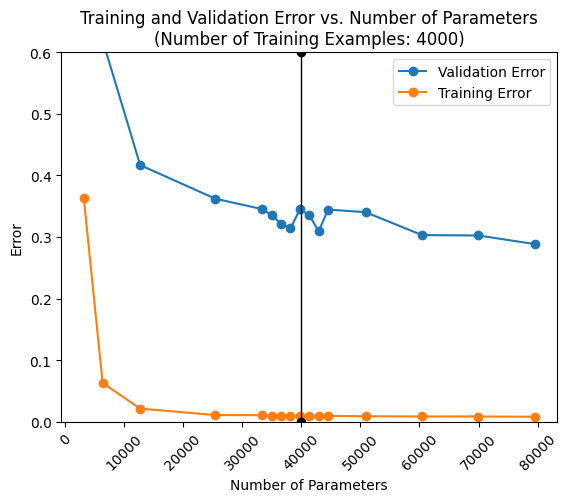

In [8]:
# ploting double descent curve
number_of_examples = len(train_images)
plt.plot(error['number of parameters'], error['Validation Error'], label='Validation Error', marker='o')
plt.plot(error['number of parameters'], error['Training Error'], label='Training Error', marker='o')
#plt.axvline(number_of_examples, color='black', linestyle='-', linewidth=1, marker='o') # last edited by Jeff, p
plt.axvline(number_of_examples * 10, color='black', linestyle='-', linewidth=1, marker='o') # jeff changed this (interpolation threshold)
plt.xlabel('Number of Parameters')
plt.ylabel('Error')
plt.title(f'Training and Validation Error vs. Number of Parameters\n(Number of Training Examples: {number_of_examples})')
plt.legend()
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(0, 0.6)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#kamal
# find two models in the two regimes having same score
# vary batch_size and claim that after a certain size, it saturates
# compare variances for different weight initializations in two regimes.

In [ ]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model with early stopping
num_parameters = 55 # <------------------------------------CHANGE THIS PARAMETER
# I propose num_parameters:
  # Under-Parameterized: 45
  # Over-Parameterized: 55, 64

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(num_parameters, activation='relu'),   # Fully connected layer
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])
sgd = SGD(momentum=0.95)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Determine the number of epochs it took for convergence
num_epochs_to_convergence = len(history.history['loss'])
print(f'Number of epochs to convergence: {num_epochs_to_convergence}')

Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 1.2749 - accuracy: 0.6369 - val_loss: 0.5589 - val_accuracy: 0.8350
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8681 - val_loss: 0.4024 - val_accuracy: 0.8875
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.9034 - val_loss: 0.3514 - val_accuracy: 0.9013
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2838 - accuracy: 0.9172 - val_loss: 0.3254 - val_accuracy: 0.9062
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.9312 - val_loss: 0.3103 - val_accuracy: 0.9187
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.9438 - val_loss: 0.3155 - val_accuracy: 0.9175
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9453 - val_loss: 0.3024 - val_accuracy: 0.9187
Epoch 8/50
50/50 [==

In [ ]:
# Calculating the convergence rate for different batch sizes
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
def model_convergence(batch_size):

    model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(32, activation='relu'),   # --------------------------  I used 45 for underparameterized model
    Dense(10, activation='softmax')  # Output layer with 10 neurons
    ])
    sgd = SGD(momentum=0.95)
    model1.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    history1 = model1.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopping],verbose =0)

    # Determine the number of epochs it took for convergence
    num_epochs_to_convergence1 = len(history1.history['loss'])

    model2 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(64, activation='relu'),   # ------------------------ I used 55 for overparameterized model
    Dense(10, activation='softmax')  # Output layer with 10 neurons
    ])
    sgd = SGD(momentum=0.95)
    model2.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    history2 = model2.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[early_stopping],verbose=0)

    # Determine the number of epochs it took for convergence
    num_epochs_to_convergence2 = len(history2.history['loss'])


    return num_epochs_to_convergence1 , num_epochs_to_convergence2


In [ ]:
batch_sizes = [2**i for i in range(1,8)]
#batch_sizes = [4,48,64,100,128,160,200,256]
batch_sizes

[2, 4, 8, 16, 32, 64, 128]

In [ ]:
val_pct = 0.2 # percent used for validation
num_samples = len(train_images) * (1 - val_pct)
epochs = []
for i in range(5):
    for batch_size in batch_sizes:

        x,y = model_convergence(batch_size)
        epochs.append({'model1': x*(math.ceil(num_samples/batch_size)), 'model2': y*(math.ceil(num_samples/batch_size)), "batch size":batch_size, "iteration":i})

epochs= pd.DataFrame(epochs)
print(epochs)


In [ ]:
epochs = epochs.groupby('batch size').mean().reset_index()

# Plot for Multiple Runs
plt.scatter(epochs["batch size"], epochs['model1'], label='Underparameterized model', marker='o')
plt.scatter(epochs["batch size"], epochs['model2'], label='Overparameterized model', marker='o')
plt.plot(epochs['batch size'], epochs['model1'])
plt.plot(epochs['batch size'], epochs['model2'])
plt.xlabel('Batch Size')
plt.ylabel('Number of Iterations until Convergence')
plt.title("Number of Iterations vs Batch Size for Underparameterized and Overparameterized regime")
plt.legend()


plt.show()

In [ ]:

batch_sizes = [4, 12, 16, 48, 64, 84, 100]
num_iter = 2 # number of times to run the same conditions

# Average Multiple Runs
epochs = []
for batch_size in batch_sizes:
  for i in range(num_iter):
    x,y = model_convergence(batch_size)
    epochs.append({'model1': x, 'model2': y, "batch size":batch_size})
epochs= pd.DataFrame(epochs)
print(epochs)



In [ ]:
# Translate Epochs to Iterations

val_pct = 0.2 # percent used for validation
num_samples = len(train_images) * (1 - val_pct)

num_iter = (num_samples / batch_size) * num_epochs
model1_num_iter = (num_samples / epochs['batch size']) * epochs['model1']
model2_num_iter = (num_samples / epochs['batch size']) * epochs['model2']

iter_df = {
    'batch size': epochs['batch size'],
    'model1': model1_num_iter,
    'model2': model2_num_iter
}
iter_df = pd.DataFrame(iter_df)
print(iter_df)

In [ ]:
# Take Average of Runs
iter_summary = iter_df.groupby('batch size').mean().reset_index()

# Plot for Multiple Runs
plt.scatter(iter_df["batch size"], iter_df['model1'], label='Underparameterized model', marker='o')
plt.scatter(iter_df["batch size"], iter_df['model2'], label='Overparameterized model', marker='o')
plt.plot(iter_summary['batch size'], iter_summary['model1'])
plt.plot(iter_summary['batch size'], iter_summary['model2'])
plt.xlabel('Batch Size')
plt.ylabel('Number of Iterations until Convergence')
plt.title("Number of Iterations vs Batch Size for Underparameterized and Overparameterized regime")
plt.legend()


plt.show()

In [ ]:
from keras.callbacks import Callback

class StopAfterIterations(Callback):
  # Saves the loss after each batch
  # Stops training after t iterations

    def __init__(self, max_iterations):
        super(StopAfterIterations, self).__init__()
        self.max_iterations = max_iterations
        self.iterations = 0
        self.accuracy = []
        self.loss = []

    def on_batch_end(self, batch, logs=None):
        self.accuracy.append(logs.get('accuracy'))
        self.loss.append(logs.get('loss'))
        self.iterations += 1
        if self.iterations >= self.max_iterations:
            self.model.stop_training = True
            print(f"Stopped training after {self.max_iterations} iterations.")

    def on_epoch_begin(self, epoch, logs=None):
            self.total_iterations = 0


In [ ]:
# Instantiate the custom callback
batch_sizes = [32,64,128,512,1024,2048]
max_iterations=500
output_under = np.zeros((max_iterations,len(batch_sizes)+1))
column_names = ['Iteration'] + [f'Batch_{batch_size}' for batch_size in batch_sizes]

output_over = np.zeros((max_iterations,len(batch_sizes)+1))
i=1
for batch_size in batch_sizes:
    # Under-Parameterized Model
    num_parameters = 45
    under_model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images
        Dense(num_parameters, activation='relu'),   # Fully connected layer with num_parameters neurons\renewcommand{\thesection}{Appendix \Alph{section}}
        Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
    ])

    # Over-Parameterized Model
    num_parameters = 55
    over_model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images
        Dense(num_parameters, activation='relu'),   # Fully connected layer with num_parameters neurons\renewcommand{\thesection}{Appendix \Alph{section}}
        Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
    ])

    under_sgd = SGD() # SGD must be defined for both regimes
    under_model.compile(optimizer=under_sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    over_sgd = SGD() # SGD must be defined for both regimes
    over_model.compile(optimizer=over_sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model and store the training history
    under_stop_after_iterations = StopAfterIterations(max_iterations)
    under_history = under_model.fit(train_images, train_labels, epochs=max_iterations, batch_size=batch_size, validation_split=0.2, callbacks=[under_stop_after_iterations],verbose=0)
    output_under[:,i] = under_stop_after_iterations.loss
    over_stop_after_iterations = StopAfterIterations(max_iterations)
    over_history = over_model.fit(train_images, train_labels, epochs=max_iterations, batch_size=batch_size, validation_split=0.2, callbacks=[over_stop_after_iterations],verbose=0)
    output_over[:,i] = over_stop_after_iterations.loss
    i=i+1
output_under[:,0] = range(under_stop_after_iterations.iterations)
output_over[:,0] = range(over_stop_after_iterations.iterations)


In [ ]:

output_under = pd.DataFrame(output_under, columns = column_names)

output_over = pd.DataFrame(output_over, columns = column_names)
#yy = under_stop_after_iterations.loss

for i, column in enumerate(output_under.columns[1:], start=1):
    plt.scatter(output_under.iloc[:, 0], output_under.iloc[:, i], alpha=1,label=column, marker='.', linestyle='-')

plt.xlabel('Iteration')
plt.ylabel('Loss')  # Adjust ylabel according to your data
plt.title('Loss vs. Iteration for Different Batch Sizes Underparameterized')
plt.legend(title='Batch Size')
plt.show()

"""
xx = range(over_stop_after_iterations.iterations)
yy = over_stop_after_iterations.loss
plt.scatter(xx, yy, label='Overparameterized model', marker='o')
"""


for i, column in enumerate(output_over.columns[1:], start=1):
    plt.scatter(output_over.iloc[:, 0], output_over.iloc[:, i], alpha=1,label=column, marker='.', linestyle='-')

plt.xlabel('Iteration')
plt.ylabel('Loss')  # Adjust ylabel according to your data
plt.title('Loss vs. Iteration for Different Batch Sizes Overparameterized')
plt.legend(title='Batch Size')
plt.show()




In [ ]:
plt.scatter(output_over[:,0], output_over[:,1], label='8', alpha=0.5, marker='.', linestyle='-')
plt.scatter(output_over[:,0], output_over[:,2], label='128', alpha=0.5, marker='.', linestyle='-')
plt.scatter(output_over[:,0], output_over[:,3], label='3200', alpha=0.5, marker='.', linestyle='-')

"""
xx = range(over_stop_after_iterations.iterations)
yy = over_stop_after_iterations.loss
plt.scatter(xx, yy, label='Overparameterized model', marker='o')
"""

#plt.plot(iter_summary['batch size'], iter_summary['model1'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Number of Iterations vs Batch Size for Underparameterized and Overparameterized regime")
plt.legend()


plt.show()


In [ ]:
output_under[350:400,0]

In [ ]:
# Instantiate the custom callback
num_train = 3200
batch_sizes = [8, 16, 32, 64, 128, 640, num_train]
max_iter = 1024
output_under = np.zeros((max_iter,len(batch_sizes)+1))
column_names = ['Iteration'] + [f'Batch_{batch_size}' for batch_size in batch_sizes]


# ========
# Fit Data
# ========
under_lst = [0] * len(batch_sizes)
over_lst = [0] * len(batch_sizes)

output_over = np.zeros((max_iter,len(batch_sizes)+1))
i=0
for batch_size in batch_sizes:

    # Under-Parameterized Model
    num_parameters = 32
    under_model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images
        Dense(num_parameters, activation='relu'),
        Dense(10, activation='softmax')  #
    ])

    # Over-Parameterized Model
    num_parameters = 64
    over_model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input images
        Dense(num_parameters, activation='relu'),
        Dense(10, activation='softmax')
    ])

    under_sgd = SGD() # SGD must be defined for both regimes
    under_model.compile(optimizer=under_sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    over_sgd = SGD() # SGD must be defined for both regimes
    over_model.compile(optimizer=over_sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # ============================================
    # Fit the model and store the training history
    # ============================================
    batches_per_epoch = int(num_train / batch_size)
    num_epochs = math.ceil(max_iter / batches_per_epoch)
    start_iter = batches_per_epoch
    end_iter = batches_per_epoch * num_epochs + batches_per_epoch

    # Underparameterized
    under_history = under_model.fit(train_images, train_labels,
                        epochs=num_epochs, batch_size=batch_size,
                        validation_split=0.2, verbose=0)
    under_df = {
        't': list(range(start_iter, end_iter, batches_per_epoch)),
        'loss': under_history.history['loss']
    }
    under_lst[i] = pd.DataFrame(under_df)

    # Overparameterized
    over_history = over_model.fit(train_images, train_labels,
                        epochs=num_epochs, batch_size=batch_size,
                        validation_split=0.2, verbose=0)
    over_df = {
        't': list(range(start_iter, end_iter, batches_per_epoch)),
        'loss': over_history.history['loss']
    }

    over_lst[i] = pd.DataFrame(over_df)
    i=i+1


In [ ]:

# Plot Results (Underparameterized)
for i in range(len(batch_sizes)):
    plt.plot(under_lst[i]['t'], np.log(under_lst[i]['loss']), alpha=1, label=batch_sizes[i])

plt.xlabel('Iteration')
plt.ylabel('Log Loss')  # Adjust ylabel according to your data
plt.title('Loss vs. Iteration for Different Batch Sizes Underparameterized')
plt.legend(title='Batch Size')
plt.show()

# Plot Results (Overparameterized)
for i in range(len(batch_sizes)):
    plt.plot(over_lst[i]['t'], np.log(over_lst[i]['loss']), alpha=1, label=batch_sizes[i])

plt.xlabel('Iteration')
plt.ylabel('Log Loss')  # Adjust ylabel according to your data
plt.title('Loss vs. Iteration for Different Batch Sizes Overparameterized')
plt.legend(title='Batch Size')
plt.show()





In [ ]:
# Get Ratio of Underparameterized / Ovewrparameterized
for i in range(5):
  print((under_lst[i] / over_lst[i]))

In [ ]:
#cody stuff

#define function to grab the norm for the weight matrices
def get_model_spectral_norms(model):
    norms = []
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, biases = layer.get_weights()
            singular_values = np.linalg.svd(weights, compute_uv=False)
            spectral_norm = np.max(singular_values)
            norms.append(spectral_norm)
    return norms

# Calculate norms of weight matrices for the underparameterized model
under_spectral_norms = get_model_spectral_norms(under_model)
print("Spectral norms of the underparameterized model weight matrices:")
for i, norm in enumerate(under_spectral_norms, 1):
    print(f"Layer {i}: {norm}")

# Calculate norms of weight matrices for the overparameterized model
over_spectral_norms = get_model_spectral_norms(over_model)
print("Spectral norms of the overparameterized model weight matrices:")
for i, norm in enumerate(over_spectral_norms, 1):
    print(f"Layer {i}: {norm}")


# Define function to grab the largest and smallest positive eigenvalues for the weight matrices
def get_model_eigenvalues(model):
    eigenvalues = []
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, _ = layer.get_weights()
            singular_values = np.linalg.svd(weights, compute_uv=False)
            max_eigenvalue = np.max(singular_values)  # Largest eigenvalue
            min_eigenvalue = np.min(singular_values[singular_values > 0]) if np.any(singular_values > 0) else 0  # Smallest positive eigenvalue
            eigenvalues.append((max_eigenvalue, min_eigenvalue))
    return eigenvalues

# Under-parameterized Model (e.g., num_parameters = 45)
under_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(45, activation='relu'),
    Dense(10, activation='softmax')
])
under_sgd = SGD(momentum=0.95)
under_model.compile(optimizer=under_sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Assume the model is already trained before this call
under_eigenvalues = get_model_eigenvalues(under_model)
print("Eigenvalues of the underparameterized model weight matrices:")
for i, (max_eig, min_eig) in enumerate(under_eigenvalues, 1):
    print(f"Layer {i} - Largest: {max_eig}, Smallest Positive: {min_eig}")

# Over-parameterized Model (e.g., num_parameters = 64)
over_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
over_sgd = SGD(momentum=0.95)
over_model.compile(optimizer=over_sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# Assume the model is already trained before this call
over_eigenvalues = get_model_eigenvalues(over_model)
print("Eigenvalues of the overparameterized model weight matrices:")
for i, (max_eig, min_eig) in enumerate(over_eigenvalues, 1):
    print(f"Layer {i} - Largest: {max_eig}, Smallest Positive: {min_eig}")